____
# Análise dos óbitos por Covid-19 na Paraíba
____

## Autor
 * **Flávio Macaúbas Torres Filho** - flaviomacaubas@gmail.com

### Laboratório de Inteligência Artificial e Macroeconomia Computacional - LABIMEC

Análise descritiva e exploratória das informações de óbitos do estado da Paraíba, a base de dados é atualizada e mantida pelo próprio autor. O próposito da investigação é analisar o comportamento dos óbitos na Paraíba e diferentes tipos de agregação.

* Base categorizada nos campos: 
<ul> 
    <li>  <b>data_inicio:</b> data ao qual os sintomas começaram - <b>Tipo:</b> Timestamp - <b>Valor:</b> data formato YYYY/MM/DD</li>
    <li>  <b>data_obito:</b> data ao qual o paciente veio a óbito - <b>Tipo:</b> Timestamp - <b>Valor:</b> data formato YYYY/MM/DD</li>
    <li>  <b>cidade:</b> cidade originária do paciente (apenas cidades do território do estado da Paraíba) - <b>Tipo:</b> String (UTF-8)</li>
    <li>  <b>genero:</b> gênero do paciente - <b>Tipo:</b> String - <b>Valor:</b> homem ou mulher </li>
    <li>  <b>diabetes:</b> se o óbito tinha qualquer tipo de diabetes - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>hipertensao:</b> se o óbito hipertensao - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>cardiaco:</b> se o óbito tinha qualquer tipo cardiopatia - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>cancer:</b> se o óbito tinha qualquer tipo de neoplasias - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>neurologica:</b> se o óbito tinha qualquer tipo de doenças neurológicas (acidentes vasculares cerebrais inclusos) - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>obesidade:</b> se o óbito era obeso - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>respiratorias:</b> se o óbito tinha qualquer tipo de doenças respitarória - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>tabagismo:</b> se o óbito era fumante ou ex-fumante - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>outras:</b> se o óbito tinha todo e qualquer doença não descrita - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>hospital:</b> local de óbito da vítima - <b>Tipo:</b> String (UTF-8) - <b>Valor:</b> Público, privado, residência e transporte</li>
    <li>  <b>data_obito:</b> data ao qual o óbito foi notificado pela Secretaria de Saúde do Estado da Paraíba - <b>Tipo:</b> Timestamp - <b>Valor:</b> data formato YYYY/MM/DD</li>
    <li>  <b>fonte:</b> link no qual as informações foi divulgada no site do Governo do Estado da Paraíba - <b>Tipo:</b> String
<\ul>

In [114]:
# Importnado bibliotecas e módulos necessários

import pandas as pd # Pandas para manipulação de dataframes
from dfply import * # Importação dos módulos necessário para trabalhar com pipe em Python
import numpy as np # Operações matemáticas
import matplotlib.dates as mdates # Arrumar as datas no eixo

# Visualização dos dados
import seaborn as sns 
import matplotlib.pyplot as plt
# Evitar ficar usando plt.show()
%matplotlib inline

In [153]:
# Configurações globais
sns.set_style('darkgrid') # background
sns.set_context('paper') # Formato artigo
plt.tight_layout()
# Parametros e rcParams vai setar configurações globais para os gráficos, ela serve também como mecanismo de controle
parametros = {'legend.fontsize': 15,
          'figure.figsize': (15,7)}
plt.rcParams.update(parametros)

<Figure size 432x288 with 0 Axes>

In [71]:
# Leitura da base dados
df = pd.read_csv('https://raw.githubusercontent.com/FlavioMacaubas/covid_19_paraiba/master/perfil_paraiba.csv')

In [4]:
# 5 primeiros elementos
df.head()

,data_inicio,data_obito,cidade,genero,idade,diabetes,hipertenso,cardiaco,cancer,neurologica,obesidade,respiratorias,tabagismo,outras,hospital,data_notificao,fonte
0,2020-03-26,2020-03-31,Patos,homem,36.0,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Privado,2020-03-31,https://paraiba.pb.gov.br/diretas/saude/corona...
1,2020-03-25,2020-04-04,Junco do Seridó,mulher,86.0,Sim,Não,Não,Não,Não,Não,Não,Não,Sim,Público,2020-04-03,https://paraiba.pb.gov.br/diretas/saude/corona...
2,2020-03-28,2020-04-02,João Pessoa,homem,43.0,SI,SI,SI,SI,SI,SI,SI,SI,SI,Privado,2020-04-03,https://paraiba.pb.gov.br/diretas/saude/corona...
3,2020-02-04,2020-04-04,João Pessoa,mulher,88.0,SI,SI,SI,SI,SI,SI,SI,SI,SI,Privado,2020-04-05,https://paraiba.pb.gov.br/diretas/saude/corona...
4,NaN,2020-03-30,Cabedelo,homem,71.0,SI,SI,SI,SI,SI,SI,SI,SI,SI,Privado,2020-04-08,https://paraiba.pb.gov.br/diretas/saude/corona...


In [72]:
# informações gerais da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Data columns (total 17 columns):
data_inicio       1333 non-null object
data_obito        1377 non-null object
cidade            1376 non-null object
genero            1377 non-null object
idade             1377 non-null float64
diabetes          1377 non-null object
hipertenso        1377 non-null object
cardiaco          1377 non-null object
cancer            1377 non-null object
neurologica       1377 non-null object
obesidade         1377 non-null object
respiratorias     1377 non-null object
tabagismo         1377 non-null object
outras            1377 non-null object
hospital          1373 non-null object
data_notificao    1377 non-null object
fonte             1377 non-null object
dtypes: float64(1), object(16)
memory usage: 183.0+ KB


# Contabilizando mortes por dia e data de notificação e acumulando

In [210]:
# Agrupa por data de óbito e acumula
mortes = (df >> group_by('data_obito') 
          >> summarize( mortes = n(X.data_obito)) 
          >> ungroup() 
          >> mutate (mortes_acumuladas = cumsum(X.mortes)))

# Agrupa por data de notificação
mortes_noti = (df >> group_by('data_notificao') 
               >> summarize(mortes_noti = n(X.data_notificao)) 
               >> rename(data_obito = 'data_notificao'))

# Leftjoin para preservar dados que não fazem parte do conjunto união
mortes = mortes >> left_join(mortes_noti, by = 'data_obito')

# Preenche NaN por 0 (para acumular corretamente)
mortes['mortes_noti'] = mortes['mortes_noti'].fillna(0)

# Cria acumulados por data de notificação, tem de suceder o preenchimento de NaNs
mortes = mortes >> mutate(mortes_noti_acumuladas = cumsum(X.mortes_noti))

# A rigor, qualquer 1 das datas pode ser usada como index
mortes.index = mortes['data_obito']

# Retira coluna de datas após setar index, ela passa a ser redundante, caso alguém queirar fazer algum tipo de merge, pode ser deparar com valores ambíguos.
mortes = mortes >> drop(X.data_obito)

mortes.head()

,mortes,mortes_acumuladas,mortes_noti,mortes_noti_acumuladas
data_obito,,,,
2020-03-24,1,1,0.0,0.0
2020-03-30,2,3,0.0,0.0
2020-03-31,2,5,1.0,1.0
2020-04-02,1,6,0.0,1.0
2020-04-04,3,9,0.0,1.0


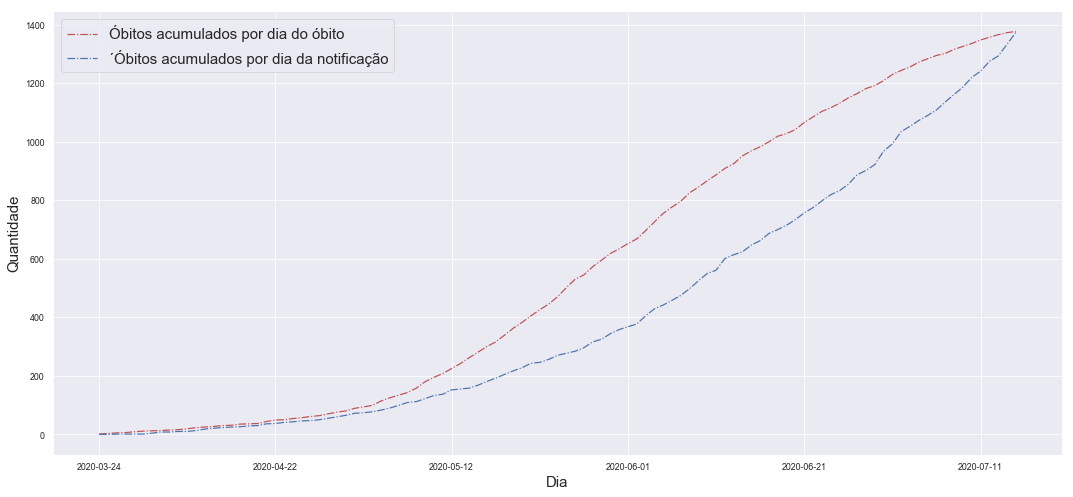

In [214]:
# Visualizando
fig, ax1 = plt.subplots()

ax1.set_xlabel('Dia', fontsize = 15) # Eixo x
ax1.set_ylabel('Quantidade', fontsize = 15) # Eixo y
ax1.plot(mortes.index, mortes['mortes_acumuladas'], 'r-.', label = 'Óbitos acumulados por dia do óbito') # gráfico de linha
ax1.plot(mortes.index, mortes['mortes_noti_acumuladas'], 'b-.', label = '´Óbitos acumulados por dia da notificação') # gráfico de linha
ax1.legend(loc = 'upper left') # Caso queira que isso seja decidido automaticamente, mudar o valor do atributo para 'best'



ax1.xaxis.set_major_locator(plt.MaxNLocator(6)) # Define a quantidade de label

fig.tight_layout()  # Ajusta layout, últil para salvar os gráficos sem correr o perigo de cortar informações

fig.savefig('mortes_pb.png')

# Peparando média móvel

O método utilizado é o Média Móvel Simples (MMS), o propósito é mostrar a tendência dessas curvas e suavizar oscilações sazonais e abruptas. A fórmula utilizada pode ser descrita pelo seguinte processo gerador:

### $\bar{p_{i}} = \frac{p_{i+1} + ... + p_{i+n}}{n}$
### $= \frac{1}{n}\sum_{j=1}^{n}p_{i+j}$
### $\bar{p_{i+1}} = \bar{p_{i}} + \frac{p_{n+i+1}}{n} - \frac{p_{n+1}}{n}$

In [207]:
# Adiciona a base de dados as médias móveis para diferentes dias
mortes = (mortes >> mutate(mm_14 = X.mortes.rolling(window = 14).mean()) 
          >> mutate(mm_10 = X.mortes.rolling(window = 10).mean()) 
          >> mutate(mm_7 = X.mortes.rolling(window = 7).mean()) 
          >> mutate(mm_noti_14 = X.mortes_noti.rolling(window = 14).mean())
          >> mutate(mm_noti_10 = X.mortes_noti.rolling(window = 10).mean())
          >> mutate(mm_noti_7 = X.mortes_noti.rolling(window = 7).mean()))


mortes.tail()

,data_obito,mortes,mortes_acumuladas,mortes_noti,mortes_noti_acumuladas,mm_14,mm_10,mm_7,mm_noti_14,mm_noti_10,mm_noti_7
data_obito,,,,,,,,,,,
2020-07-11,2020-07-11,12,1348,21.0,1241.0,13.071429,11.8,10.857143,25.285714,24.8,24.000000
2020-07-12,2020-07-12,9,1357,34.0,1275.0,12.500000,11.3,10.428571,26.642857,24.0,26.428571
2020-07-13,2020-07-13,9,1366,18.0,1293.0,12.428571,11.0,10.142857,26.500000,24.0,26.285714
2020-07-14,2020-07-14,7,1373,40.0,1333.0,11.714286,10.1,10.142857,26.071429,26.0,28.142857
2020-07-15,2020-07-15,4,1377,41.0,1374.0,10.500000,9.3,8.714286,27.214286,28.4,30.285714


# Analisando por data de notificação

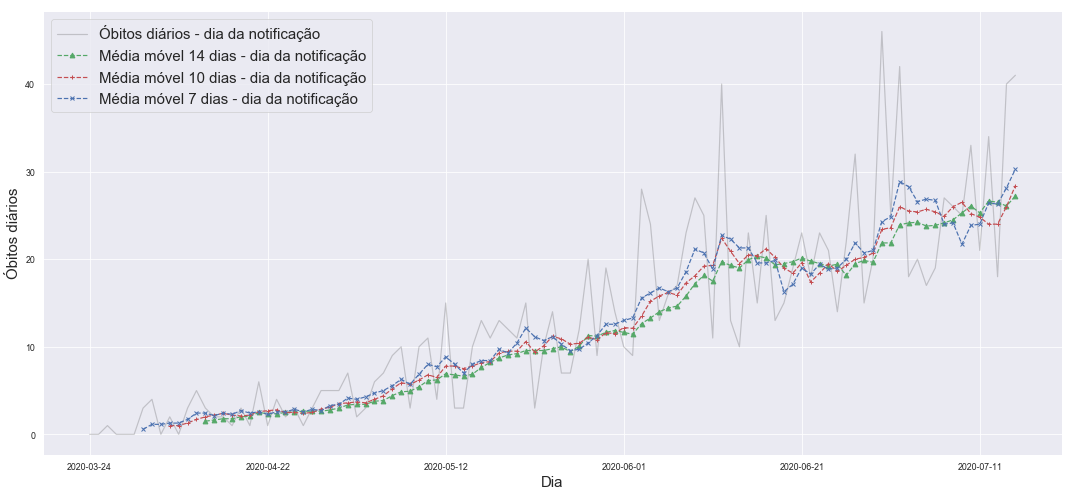

In [204]:
# Visualizando
fig, ax1 = plt.subplots()

ax1.set_xlabel('Dia', fontsize = 15) # Eixo x
ax1.set_ylabel('Óbitos diários', fontsize = 15) # Eixo y
ax1.plot(mortes.index, mortes['mortes_noti'], 'k', label = 'Óbitos diários - dia da notificação ', alpha = 0.2) # gráfico de linha
ax1.plot(mortes.index, mortes['mm_noti_14'], 'g--^', label = 'Média móvel 14 dias - dia da notificação') # gráfico de linha
ax1.plot(mortes.index, mortes['mm_noti_10'], 'r--+', label = 'Média móvel 10 dias - dia da notificação') # gráfico de linha
ax1.plot(mortes.index, mortes['mm_noti_7'], 'b--x', label = 'Média móvel 7 dias - dia da notificação') # gráfico de linha
ax1.legend(loc = 'upper left') # Caso queira que isso seja decidido automaticamente, mudar o valor do atributo para 'best'

ax1.xaxis.set_major_locator(plt.MaxNLocator(6)) # Define a quantidade de label

fig.tight_layout()  # Ajusta layout, últil para salvar os gráficos sem correr o perigo de cortar informações

fig.savefig('mm_noti_10_14_pb.png')

# Analisando por data do óbito

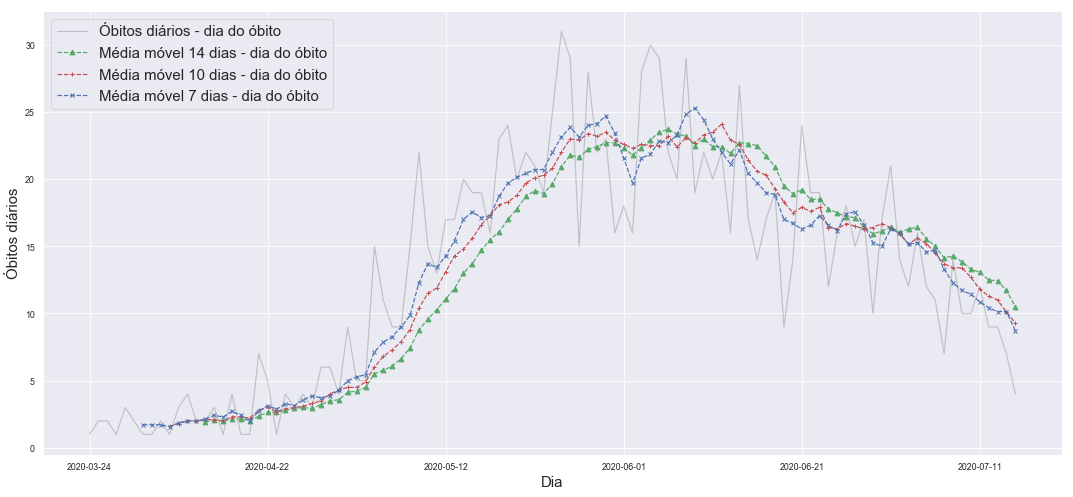

In [209]:
# Visualizando
fig, ax1 = plt.subplots()

ax1.set_xlabel('Dia', fontsize = 15) # Eixo x
ax1.set_ylabel('Óbitos diários', fontsize = 15) # Eixo Y
ax1.plot(mortes.index, mortes['mortes'], 'k-', label = 'Óbitos diários - dia do óbito', alpha = 0.2) # gráfico de linha
ax1.plot(mortes.index, mortes['mm_14'], 'g--^', label = 'Média móvel 14 dias - dia do óbito') # gráfico de linha
ax1.plot(mortes.index, mortes['mm_10'], 'r--+', label = 'Média móvel 10 dias - dia do óbito') # gráfico de linha
ax1.plot(mortes.index, mortes['mm_7'], 'b--x', label = 'Média móvel 7 dias - dia do óbito') # gráfico de linha
ax1.legend(loc = 'upper left') # Caso queira que isso seja decidido automaticamente, mudar o valor do atributo para 'best'

ax1.xaxis.set_major_locator(plt.MaxNLocator(6))  # Define a quantidade de label

fig.tight_layout()   # Ajusta layout, últil para salvar os gráficos sem correr o perigo de cortar informações
fig.savefig('mm_10_14_pb.png')